# Project: Air Quality Prediction Model using Machine Learning algorithms

    In early 2011, officials reported that pollution in Italy was reaching crisis levels. What's particularly troublesome is particle pollution that pervades Italy, and accounts for breathing and heart problems, causing a whopping 9% of deaths of Italians over the age of 30. New report finds that air pollution is the single biggest environmental health risk in Europe, causing hundreds of thousands of premature deaths. Particulate matter, ozone, nitrogen dioxide. Europe’s air quality is significantly threatened by these pollutants, mostly in urban centres.





The dataset used in this notebook could be found on this link: https://archive.ics.uci.edu/ml/datasets/Air+Quality

# Import Libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Dataset structure & description

        In this project I have used 15 attributes and around 9300 trained and test data to evaluate the R-squared score. And this coefficient is found out by using different Regression Methods. The dataset used are shown in the below. 

**Atributes info:**

    0 Date	(DD/MM/YYYY) 
    1 Time	(HH.MM.SS) 
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)	
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	
    7 True hourly averaged NOx concentration in ppb (reference analyzer) 
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
    12 Temperature in Â°C	
    13 Relative Humidity (%) 
    14 AH Absolute Humidity 

# Data Load

In [2]:
air_data = pd.read_excel('AirQualityUCI.xlsx')
print("Number of records: {}\nNumber of variables: {}".format(air_data.shape[0], air_data.shape[1]))


Number of records: 9357
Number of variables: 15


In [3]:
display(air_data)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.000000,150,11.881723,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.250000,112,9.397165,954.750000,103.0,1173.750000,92.0,1558.750000,972.250000,13.300000,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.000000,88,8.997817,939.250000,131.0,1140.000000,114.0,1554.500000,1074.000000,11.900000,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.500000,80,9.228796,948.250000,172.0,1092.000000,122.0,1583.750000,1203.250000,11.000000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.250000,51,6.518224,835.500000,131.0,1205.000000,116.0,1490.000000,1110.000000,11.150000,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.000000,38,4.741012,750.250000,89.0,1336.500000,96.0,1393.000000,949.250000,11.175000,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.000000,31,3.624399,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.250000,31,3.326677,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.000000,24,2.339416,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.750000,19,1.696658,560.750000,-200.0,1705.000000,-200.0,1234.750000,501.250000,10.250000,60.200001,0.751657


In [4]:
# Display a desription of total data set
display(air_data.describe())

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [5]:
#Information about the Data
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB


There are no missing values in this dataset, so we don’t need to modify any data.

In [6]:
air_data.shape

(9357, 15)

# Visualization

        Let us visualize the absolute correlation coefficient of target variable with all the other variables. Higher absolute correlation coefficient means the variable can provide more information about how the target variable moves as shown in below figure.

C:\Users\user1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


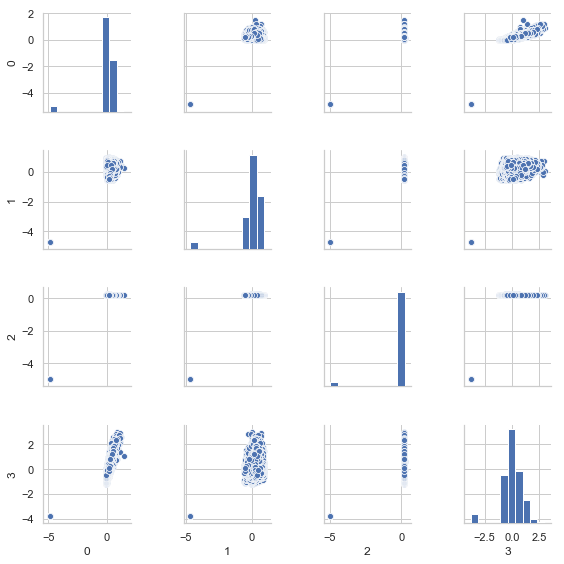

In [7]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot = ['C6H6(GT)', 'RH', 'AH', 'PT08.S1(CO)']

data_to_plot = air_data[features_plot]
data_to_plot = scalar.fit_transform(data_to_plot)
data_to_plot = pd.DataFrame(data_to_plot)

sns.pairplot(data_to_plot, size=2.0);
plt.tight_layout()
plt.show()

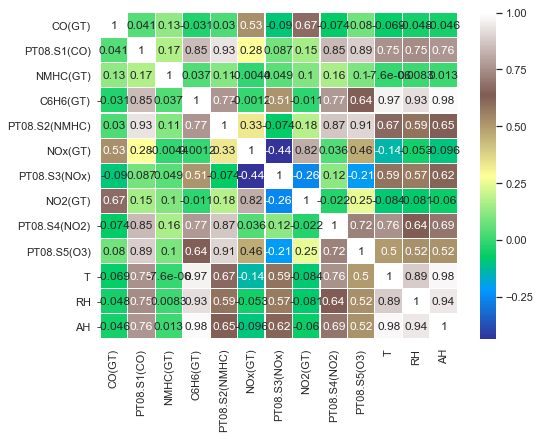

In [8]:
sns.heatmap(air_data.corr(),annot=True, cmap='terrain', linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

        Seeing above heatmap, I infer that none of displayed value pairs is having an explicitly high correlation, so there is no necessity to ditch any feature at this stage. I also notice a negative correlation between ‘PT08.S3(NOx)' and ‘NOx(GT)’, PT08.S3(NOx)’ and ‘NO2(GT)’, ‘PT08.S3(NOx)' and ‘PT08.S5(O3)’ . And there also exists some of negative correlation values relatively less than the mentioned above.

## Step 1. Preprocessing data

In [9]:
air_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## Step 2. Features vs Labels

In [10]:
features = air_data

In [11]:
features = features.drop('Date', axis=1)
features = features.drop('Time', axis=1)
features = features.drop('C6H6(GT)', axis=1)
features = features.drop('PT08.S4(NO2)', axis=1)

In [12]:
labels = air_data['C6H6(GT)'].values

In [13]:
features = features.values

## Step 3. Train and test portions

In [14]:
 from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [16]:
print("X_trian shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_trian shape --> (6549, 11)
y_train shape --> (6549,)
X_test shape --> (2808, 11)
y_test shape --> (2808,)


## Step 4. Regression

### Step 4.1 Linear Regression

It is one of the most widely known modeling technique. Linear regression is usually among the first few topics which people pick while learning predictive modeling. In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print("Predicted values:", regressor.predict(X_test))

Predicted values: [  10.80465729   12.883162     20.52891883 ... -200.32873909   20.37164881
    7.20007983]


In [20]:
print("R^2 score for liner regression: ", regressor.score(X_train, y_train))

R^2 score for liner regression:  0.9991558434493987


In [21]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

R^2 score for liner regression:  0.9993767289506726


## Decision Tree
A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node.
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. 


In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [25]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9999983940566405


### Step 4.4 Lasso regression

    Lasso (Least Absolute Shrinkage and Selection Operator) also penalizes the absolute size of the regression coefficients. In addition, it is capable of reducing the variability and improving the accuracy of linear regression models.
    Lasso regression differs from ridge regression in a way that it uses absolute values in the penalty function, instead of squares. This leads to penalizing (or equivalently constraining the sum of the absolute values of the estimates) values which causes some of the parameter estimates to turn out exactly zero. 

In [26]:
from sklearn.linear_model import Lasso

In [27]:
indiana_jones = Lasso(alpha=1.0)
indiana_jones.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
print("Coefficient of determination R^2 <-- on train set : {}".format(indiana_jones.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set : 0.9990601619875135


In [29]:
print("Coefficient of determination R^2 <-- on test set: {}".format(indiana_jones.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9992931687782275


## Step 5. Feature selection

In [30]:
from sklearn.ensemble import ExtraTreesRegressor

In [31]:
etr = ExtraTreesRegressor(n_estimators=300)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
print(etr.feature_importances_)
indecis = np.argsort(etr.feature_importances_)[::-1]

[1.70513820e-04 9.62949347e-02 4.73063539e-06 7.14764818e-02
 4.71354843e-04 5.00312568e-02 1.24781446e-04 6.68416973e-02
 2.12464007e-01 2.41419206e-01 2.60701036e-01]


In [33]:
print("Coefficient of determination R^2 <-- on test set: {}".format(etr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9999994318624236


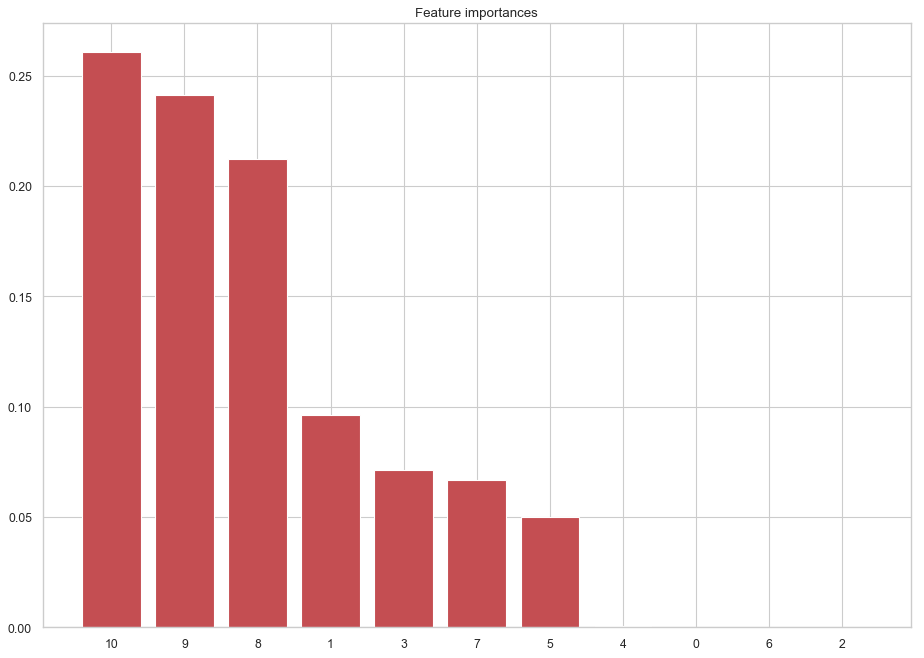

In [34]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), etr.feature_importances_[indecis],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indecis)
plt.show()